In [1]:
import pickle
from multiscale_new import *
from sklearn.metrics import mean_squared_error
from matplotlib import collections  as mc

## Importing data

In [2]:
Data1 = pickle.load(open( "Data1.p", "rb" ))  ## 1d schwefel
Data2 = pickle.load(open( "Data2.p", "rb" )) ## 1d noisy gramacy and lee
Data3 = pickle.load(open( "Data3.p", "rb" )) ## 2d Schwefel
Data4 = pickle.load(open( "Data4.p", "rb" )) ## 2d DEM dataset

### Data3

In [3]:
Data = Data3[:,0:-1]
maxs = 15
delta = 1.0e-2
eps = epsilon_0(Data,maxs,delta)
print(eps)
sparse1,Bs1,Cs1,f1,T1,meanerror1 = KfoldCV(Data,2,eps,maxs)

0.0003347190328038731
1
2


In [4]:
scales = sorted(set(sparse1[:,-1]))
data3 = []
for ss in range(16):
    ind = np.where(sparse1[:,-1] <= ss)[0]
    Bs = Bs1[:,ind]
    Cs = Cs1[ind]
    proj = Bs.dot(Cs)
    mse = mean_squared_error(Data3[:,2],proj)
    data3.append([Bs.shape[1]/Bs.shape[0],mse])
data3 = np.array(data3)

### Data4

In [5]:
Data = Data4
maxs = 15
delta = 1.0e-2
eps = epsilon_0(Data,maxs,delta)
print(eps)
sparse2,Bs2,Cs2,f2,T2,meanerror2 = KfoldCV(Data,2,eps,maxs)

0.00022907819722110142
1
2


In [6]:
scales = sorted(set(sparse2[:,-1]))
data4 = []
for ss in np.arange(16):
    ind = np.where(sparse2[:,-1] <= ss)[0]
    
    Bs = Bs2[:,ind]
    Cs = Cs2[ind]
    #print(len(ind),len(ind)/Bs.shape[0],Bs.shape)
    proj = Bs.dot(Cs)
    mse = mean_squared_error(Data4[:,2],proj)
    data4.append([Bs.shape[1]/Bs.shape[0],mse])
data4 = np.array(data4)

### Plotting

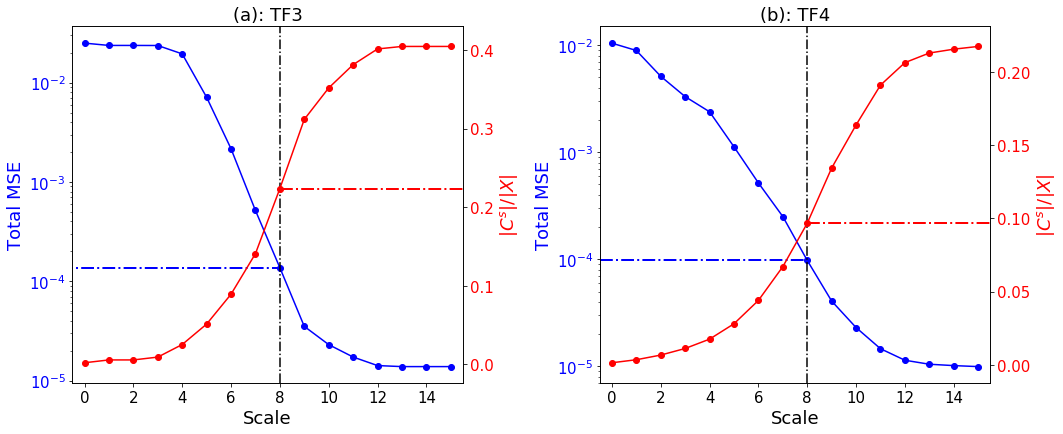

In [7]:
fig = figure(figsize=(15,5))

### Multiscale
ax = fig.add_subplot(1,2,1)
ax.plot(np.arange(len(data3)),data3[:,1],color = 'b')  ### MSE on Y axis
ax.scatter(np.arange(len(data3)),data3[:,1],color = 'b')
ax.set_yscale('log')
yticks(size = 15)
ax.set_ylabel('Total MSE',size = 18,color ='b')
ax.set_xlabel('Scale',size = 18)
xticks(size = 15)
ax.tick_params(axis='y', labelcolor='b')
ax.set_xlim([-0.5,15.5])

axvline(x = 8,linestyle = '-.',color = 'k')
lines = [[(-1, data3[8,1]), (8, data3[8,1])]]
lc = mc.LineCollection(lines, colors='b', linewidths=2,linestyle = '-.')
ax.add_collection(lc)

ax2 = ax.twinx()
ax2.plot(np.arange(len(data3)),data3[:,0],color = 'r')  ### Compression on Y axis
ax2.scatter(np.arange(len(data3)),data3[:,0],color = 'r')
xticks(size = 15)
yticks(size = 15)
lines = [[(8, data3[8,0]), (15.5, data3[8,0])]]
lc = mc.LineCollection(lines, colors='r', linewidths=2,linestyle = '-.')
ax2.add_collection(lc)

ax2.set_ylabel('$|C^s|/|X|$',size = 18,color ='r')
ax2.tick_params(axis='y', labelcolor='r')
ax.set_title('(a): TF3',size = 18)
#grid(True)


########
ax = fig.add_subplot(1,2,2)
ax.plot(np.arange(len(data4)),data4[:,1],color = 'b')  ### MSE on Y axis
ax.scatter(np.arange(len(data4)),data4[:,1],color = 'b')
ax.set_yscale('log')
yticks(size = 15)
ax.set_ylabel('Total MSE',size = 18,color ='b')
ax.set_xlabel('Scale',size = 18)
xticks(size = 15)
ax.tick_params(axis='y', labelcolor='b')
ax.set_xlim([-0.5,15.5])

axvline(x = 8,linestyle = '-.',color = 'k')
lines = [[(-0.5, data4[8,1]), (8, data4[8,1])]]
lc = mc.LineCollection(lines, colors='b', linewidths=2,linestyle = '-.')
ax.add_collection(lc)

ax2 = ax.twinx()
ax2.plot(np.arange(len(data4)),data4[:,0],color = 'r')  ### Compression on Y axis
ax2.scatter(np.arange(len(data4)),data4[:,0],color = 'r')
xticks(size = 15)
yticks(size = 15)
lines = [[(8, data4[8,0]), (15.5, data4[8,0])]]
lc = mc.LineCollection(lines, colors='r', linewidths=2,linestyle = '-.')
ax2.add_collection(lc)

ax2.set_ylabel('$|C^s|/|X|$',size = 18,color ='r')
ax2.tick_params(axis='y', labelcolor='r')
ax.set_title('(b): TF4',size = 18)

subplots_adjust(left=0.09, bottom = 0, right = 0.94, top = 0.99,wspace = 0.35,hspace = 0.2) 
savefig('Pic5.pdf', bbox_inches='tight')



show()
